In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("heart_health_data.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

All data is numeric as we can see

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Visualization

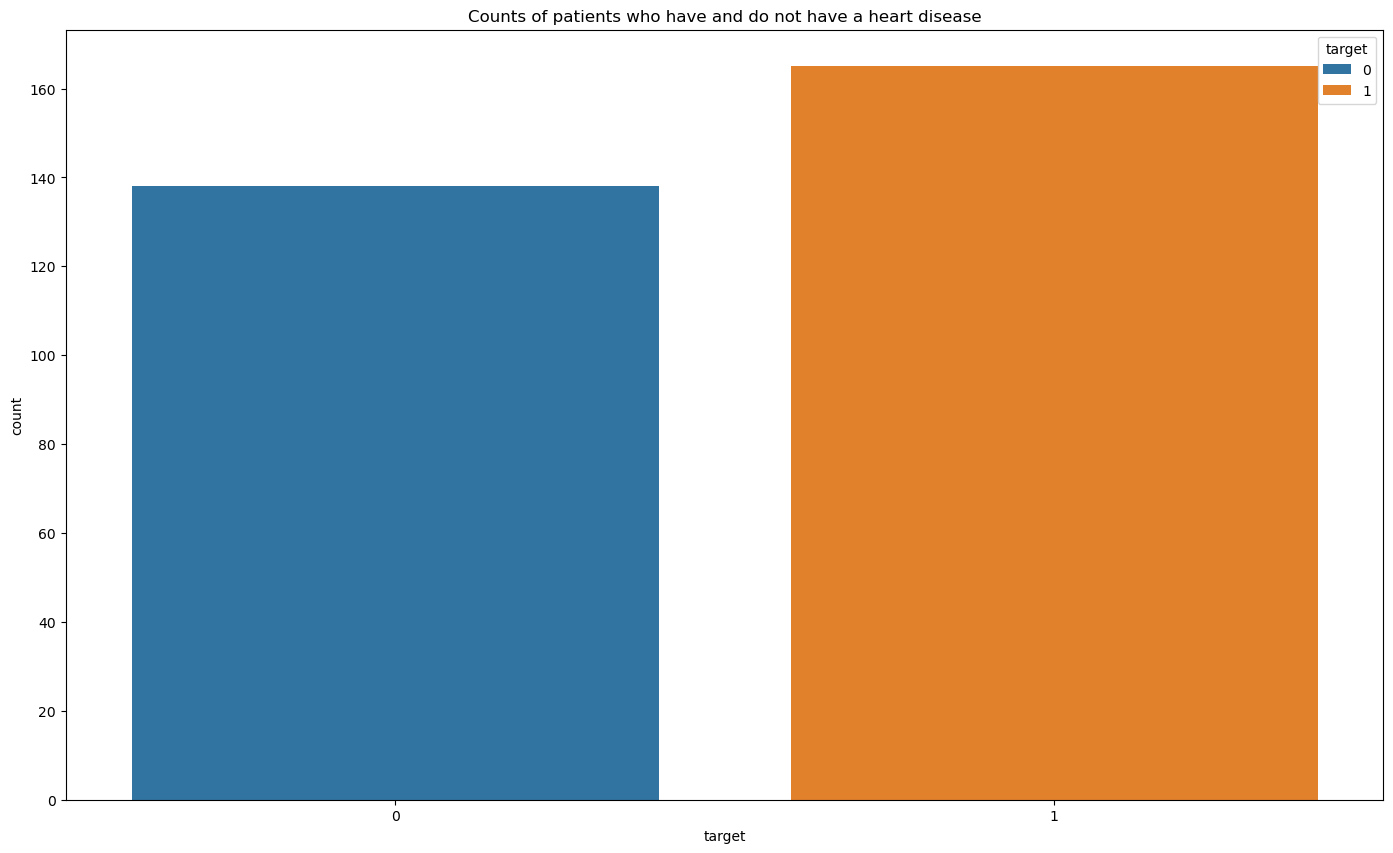

In [10]:
#Visualize the number of patients having heart disease and not having heart diesase
plt.figure(figsize=(17,10))
sns.countplot(data = df ,x = "target",hue ="target")
plt.title('Counts of patients who have and do not have a heart disease')
plt.show()

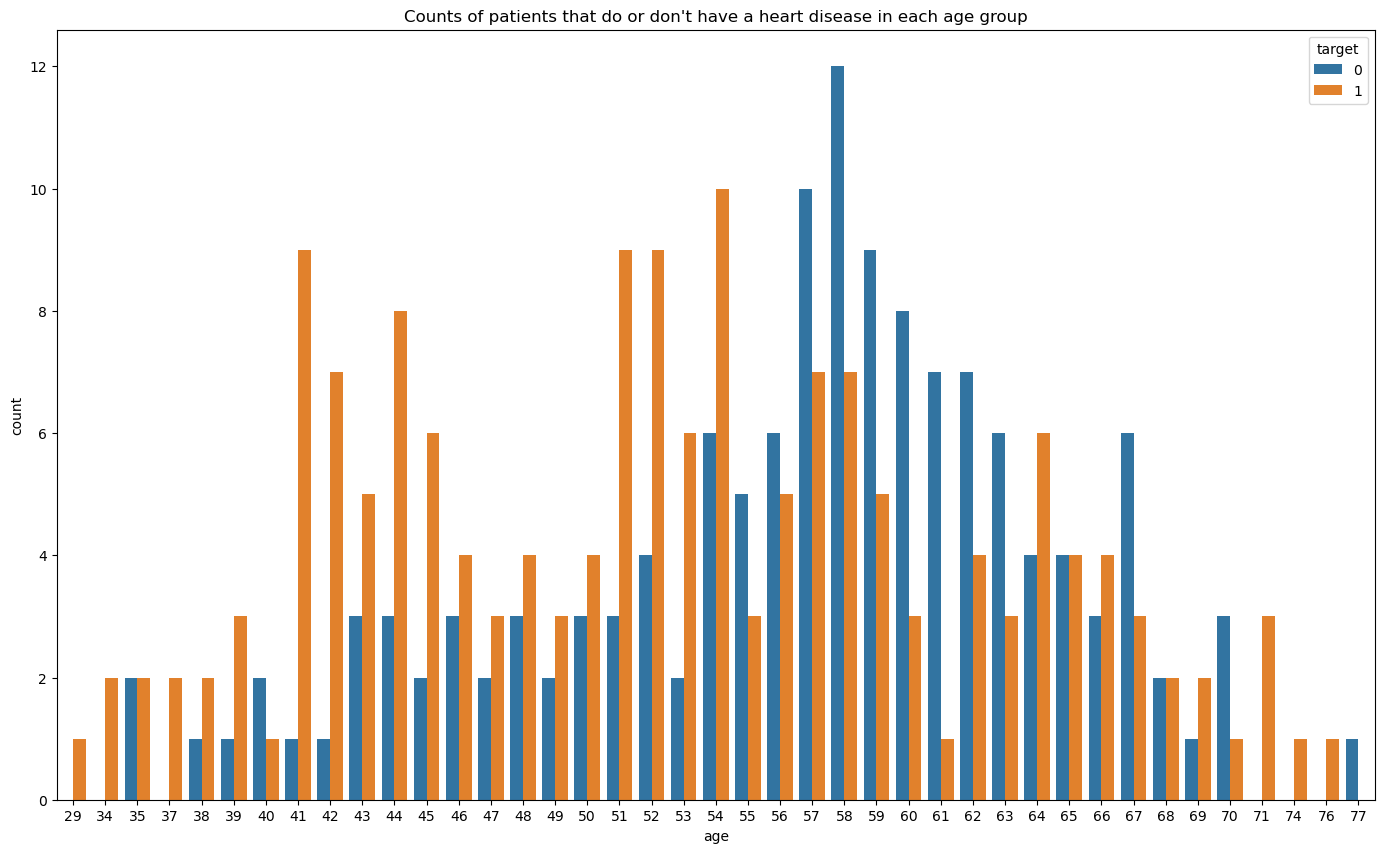

In [11]:
#Visualize the age and whether a patient has disease or not
plt.figure(figsize=(17,10))
sns.countplot(data = df ,x = "age", hue ="target")
plt.title('Counts of patients that do or don\'t have a heart disease in each age group')
plt.show()

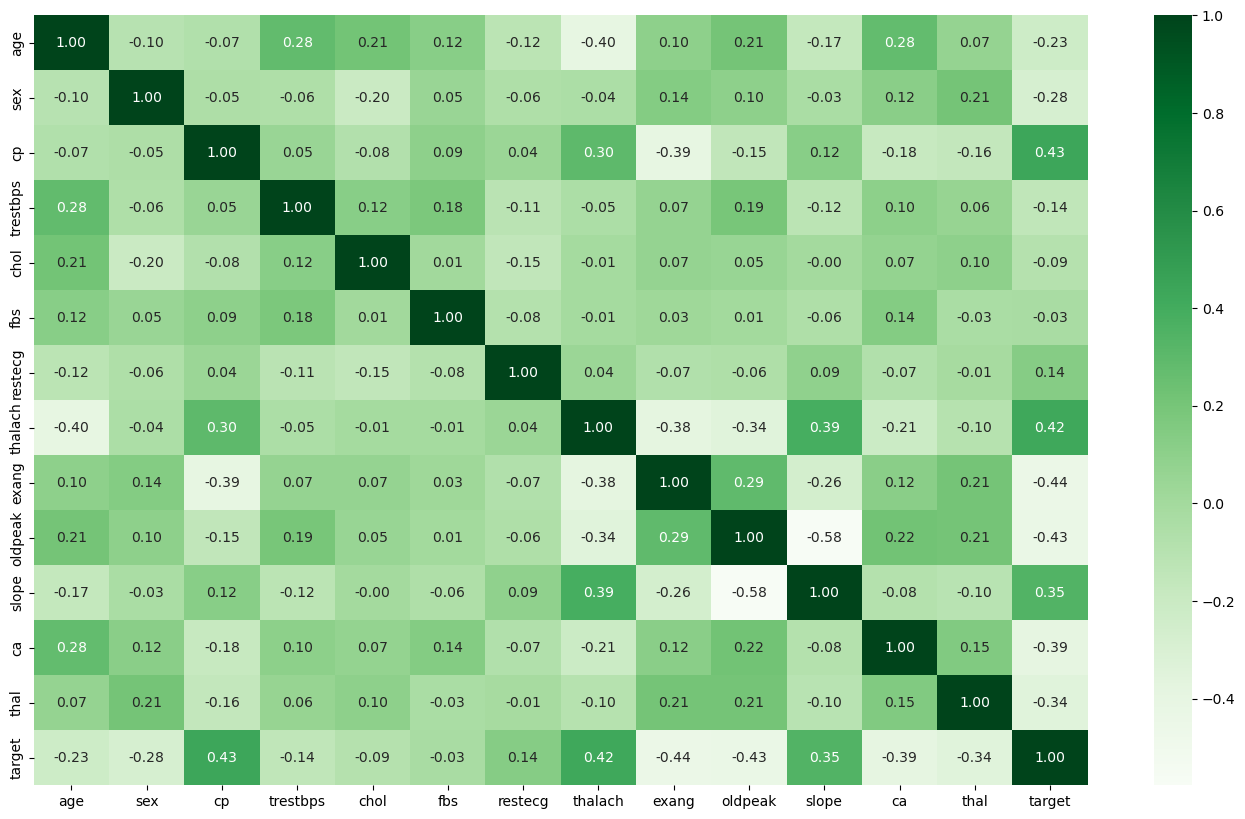

In [12]:
#Visualize correlation between all features using a heat map
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), cmap= "Greens", annot =True,fmt = '.2f')
plt.show()

In [13]:
y =df["target"]
x = df.iloc[:,:-1]

In [14]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.3,random_state = 42)

In [15]:
from sklearn.linear_model import LogisticRegression as LR
log_model = LR()

In [16]:
log_model.fit(x_train,y_train)

C:\Users\david\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = log_model.predict(x_test)

In [18]:
from sklearn.metrics import *

In [231]:
log_prec = precision_score(y_test,y_pred)
log_rec = recall_score(y_test,y_pred)
log_acc = accuracy_score(y_test,y_pred)
print(f'Logisitic Regression Accuracy: {log_acc * 100:.2f}%')
print(f'Logisitic Regression Recall: {log_rec * 100:.2f}%')
print(f'Logisitic Regression Precison: {log_prec* 100:.2f}%')

Logisitic Regression Accuracy: 81.32%
Logisitic Regression Recall: 84.00%
Logisitic Regression Precison: 82.35%


In [243]:
print(classification_report(y_test, y_pred, target_names = ["Heart Disease","No Heart Disease"]))

                  precision    recall  f1-score   support

   Heart Disease       0.80      0.78      0.79        41
No Heart Disease       0.82      0.84      0.83        50

        accuracy                           0.81        91
       macro avg       0.81      0.81      0.81        91
    weighted avg       0.81      0.81      0.81        91



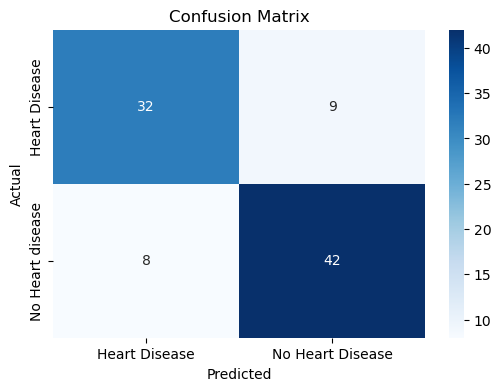

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Heart Disease', 'No Heart Disease'], yticklabels=['Heart Disease', 'No Heart disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Of the 41 patients in the test that truly have a heart disease our model falsely predicted that 9 of them do not have a heart disease.
Of the 50 patients in the test that trule don't have a disease, our model false predicted that 8 of them do have a heart disease

In [22]:
from sklearn.tree import DecisionTreeClassifier as DT
m = df.iloc[:,:-1]
n = df["target"]
X_train, X_test, Y_train, Y_test = tts(m, n, test_size=0.3, random_state=42)
dt = DT(random_state=42)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [88]:
#from sklearn import tree
import graphviz
from IPython.display import Image,SVG


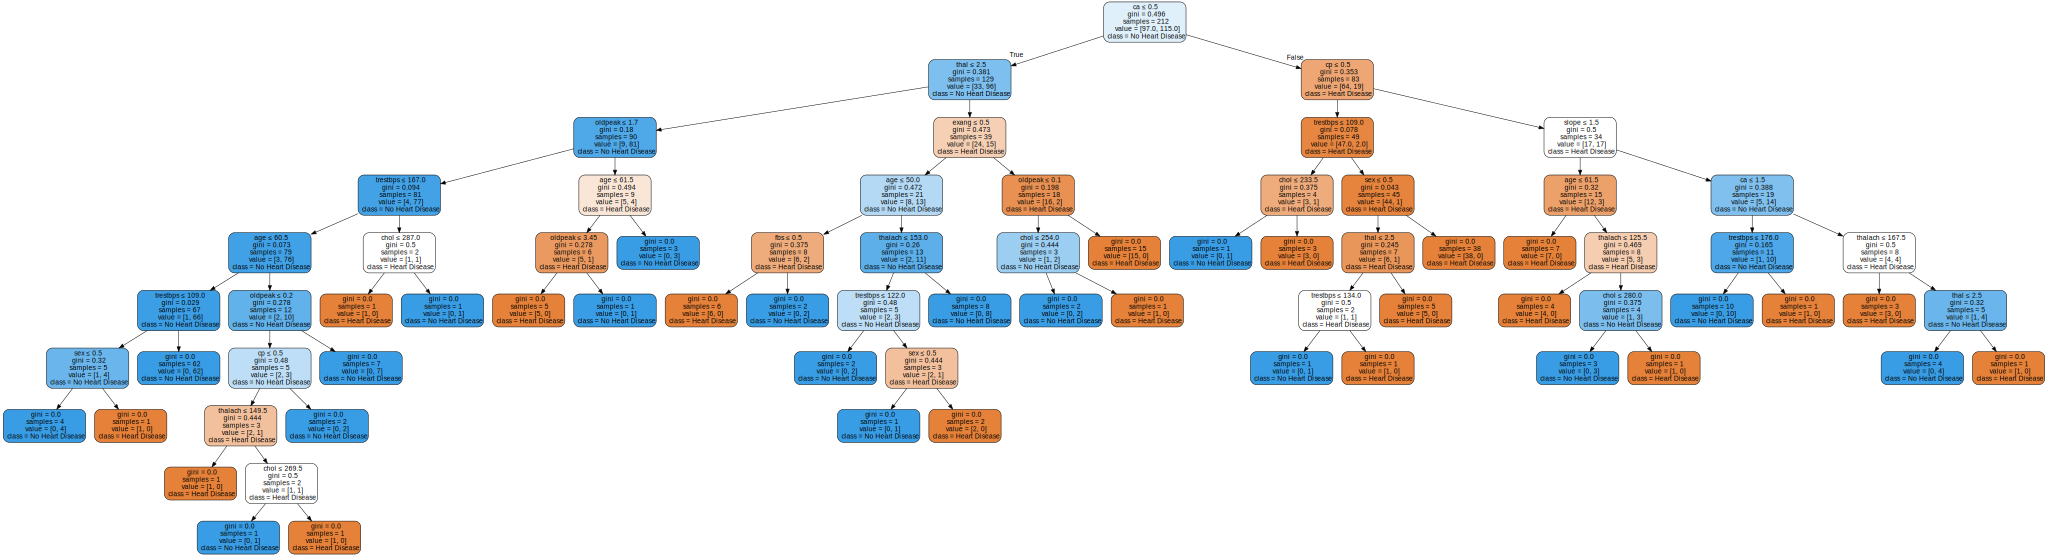

In [90]:
dot_data = tree.export_graphviz(dt, 
                  feature_names=m.columns,  
                  class_names=['Heart Disease', 'No Heart Disease'],  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

In [25]:
graph.format = 'png'
dt_render= graph.render('dtree_render',view=False) #<-- change view to True to view as png

In [26]:
dt_pred =dt.predict(X_test)

In [229]:
dt_prec = precision_score(y_test,dt_pred)
dt_rec = recall_score(y_test,dt_pred)
dt_acc = accuracy_score(y_test,dt_pred)
print(f'Decision Tre Accuracy: {dt_acc * 100:.2f}%')
print(f'Decision Tree Recall: {dt_rec * 100:.2f}%')
print(f'Decision Tree Precison: {dt_prec* 100:.2f}%')

Decision Tre Accuracy: 73.63%
Decision Tree Recall: 70.00%
Decision Tree Precison: 79.55%


In [245]:
print(classification_report(y_test, dt_pred, target_names = ["Heart Disease","No Heart Disease"]))

                  precision    recall  f1-score   support

   Heart Disease       0.68      0.78      0.73        41
No Heart Disease       0.80      0.70      0.74        50

        accuracy                           0.74        91
       macro avg       0.74      0.74      0.74        91
    weighted avg       0.74      0.74      0.74        91



In [28]:
dt_conf_matrix = confusion_matrix(Y_test,dt_pred)

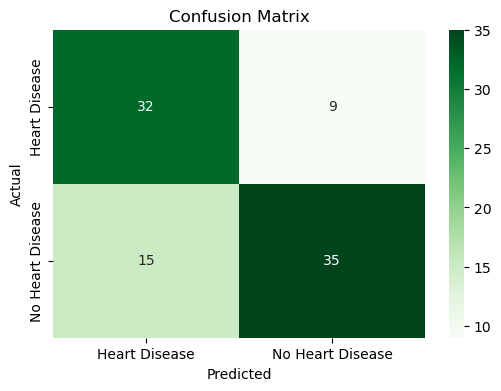

In [29]:
plt.figure(figsize=(6, 4))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Heart Disease', 'No Heart Disease'], yticklabels=['Heart Disease', 'No Heart Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

The Decison Tree Model is less accurate as we can see
Of the 41 patients in the test that truly have a heart disease our model falsely predicted that 9 of them do not have a heart disease.
However, Of the 50 patients in the test that trule don't have a disease, our model false predicted that 15 of them do have a heart disease

In [217]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators=50, max_depth= 4, max_features = 3, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=3, n_estimators=50,
                       random_state=42)

In [215]:
#viewing one random tree in the forest at time
rand_est = len(rf.estimators_)
est = np.random.randint(rand_est)

tree = rf.estimators_[est]
dot_data = export_graphviz(tree, out_file=None, 
                          feature_names=x.columns,  # Feature names
                           class_names=['Heart Disease', 'No Heart Disease'],  # Target class names
                          filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("heart_disease_trees in forest")
graph.format = 'png'
rf_render= graph.render('dtree_render',view= True)



############################################################################################################
# Fair Warning! You can use this loop to view all trees in the forest but it will be a continous pop up of 50(for me) or whatever amount of trees you have
#for tree in rf.estimators_:
#    dot_data = export_graphviz(tree, out_file=None, 
#                           feature_names=x.columns,  # Feature names
#                           class_names=['Heart Disease', 'No Heart Disease'],  # Target class names
#                           filled=True, rounded=True, special_characters=True)
#
#   graph = graphviz.Source(dot_data)
#    graph.render("heart_disease_trees in forest")
#    graph.format = 'png'
#    rf_render= graph.render('dtree_render',view= False)"""
############################################################################################################

In [134]:
rf_pred = rf.predict(X_test)

In [136]:
rf_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [225]:
rf_prec = precision_score(y_test,rf_pred)
rf_rec = recall_score(y_test,rf_pred)
rf_acc = accuracy_score(y_test,rf_pred)
print(f'Random Forest Accuracy: {rf_acc * 100:.2f}%')
print(f'Random Forest Recall: {rf_rec * 100:.2f}%')
print(f'Random Forest Precison: {rf_prec* 100:.2f}%')

Random Forest Accuracy: 85.71%
Random Forest Recall: 88.00%
Random Forest Precison: 86.27%


In [247]:
print(classification_report(y_test, rf_pred, target_names = ["Heart Disease","No Heart Disease"]))

                  precision    recall  f1-score   support

   Heart Disease       0.85      0.83      0.84        41
No Heart Disease       0.86      0.88      0.87        50

        accuracy                           0.86        91
       macro avg       0.86      0.85      0.86        91
    weighted avg       0.86      0.86      0.86        91



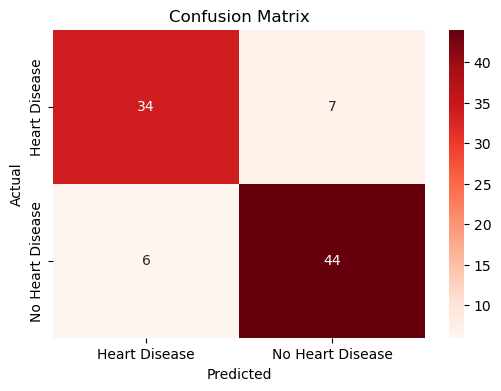

In [140]:
rf_conf_matrix = confusion_matrix(y_test,rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Heart Disease', 'No Heart Disease'], yticklabels=['Heart Disease', 'No Heart Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

We can see that the accuracy of the Random forest is much better than the decision tree model and slightly better than the logistic regression model. Of the 41 patients in the test that truly have a heart disease our model falsely predicted that 7 of them do not have a heart disease which less than previous models.Additionally  in the test that trule don't have a disease, our model only falsely predicted that 6 of them do have a heart disease
In conclusion, based of the accuracy, recall and precision, the best for us to use for predicting the if a patient has a heart disease or not is the Random Tree Classfier Model. 